In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
gd = pd.read_csv(r"C:\Users\Nilav\Downloads\Datasets\DivyaThakur\googleplaystore.csv")

In [6]:
type(gd)

pandas.core.frame.DataFrame

In [7]:
gd.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
gd.shape

(10841, 13)

In [9]:
gd.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


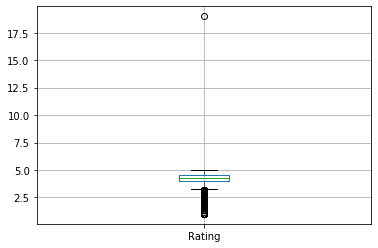

In [10]:
gd.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297B9E11208>]],
      dtype=object)

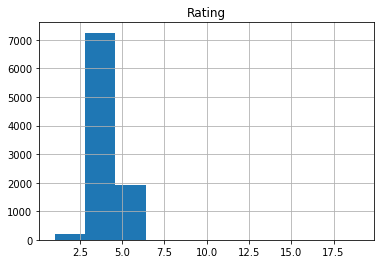

In [11]:
gd.hist()  # right_skewed

In [12]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [13]:
gd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
gd[gd.Rating > 5] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
gd.drop([10472], inplace = True)

In [16]:
gd[10469:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


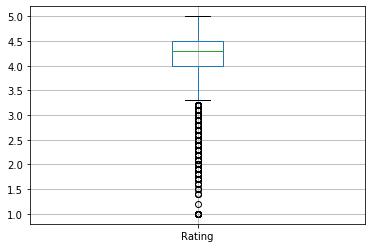

In [17]:
gd.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297B9FDB5C0>]],
      dtype=object)

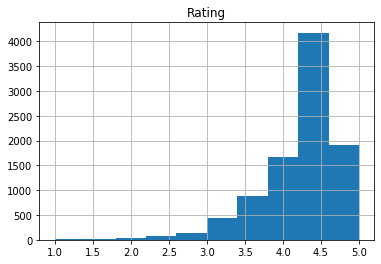

In [18]:
gd.hist()

# For right or left skewed data, we use median instead of mean

### Remove the columns that are 90% empty

In [19]:
threshold = len(gd) * 0.1
threshold

1084.0

In [20]:
gd.dropna(thresh = threshold, axis = 1, inplace = True)
gd.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## Data imputation and Manipulation

### Filling null values  with appropriate mean, median and mode values!


### Numerical values = median (since data is skewed)

In [21]:
def impute_median(series):
    return series.fillna(series.median())

In [22]:
gd.Rating = gd['Rating'].transform(impute_median)

In [24]:
gd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Categorical values = mode

In [28]:
# modes of categorical values

print(gd.Type.mode())
print(gd['Current Ver'].mode())
print(gd['Android Ver'].mode())

# all are unimodal values

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [29]:
# Fill empty data with fillna

gd['Type'].fillna(str(gd['Type'].mode().values[0]), inplace = True)
gd['Current Ver'].fillna(str(gd['Current Ver'].mode().values[0]), inplace = True)
gd['Android Ver'].fillna(str(gd['Android Ver'].mode().values[0]), inplace = True)

gd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

 ### Lets convert 'Price', 'Reviews' and 'Installs' into numerical values 

In [33]:
gd.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [34]:
gd.Price.value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$1.75          1
$5.00          1
$74.99         1
$389.99        1
$2.60          1
Name: Price, Length: 92, dtype: int64

In [41]:
gd.Reviews.value_counts()

0.0          596
1.0          272
2.0          214
3.0          175
4.0          137
            ... 
768833.0       1
3252896.0      1
260651.0       1
154264.0       1
909204.0       1
Name: Reviews, Length: 6001, dtype: int64

In [37]:
# Converting Price

gd.Price = gd['Price'].apply(lambda x: str(x).replace('$','') \
                             if '$' in str(x) else str(x))
gd.Price = gd['Price'].apply(lambda x : float(x))
type(gd.Price)

pandas.core.series.Series

In [38]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [42]:
# Converting  Installs

gd.Installs = gd.Installs.apply(lambda x : str(x).replace('+','') \
                             if '+' in str(x) else str(x))
gd.Installs = gd.Installs.apply(lambda x : str(x).replace(',','') \
                             if ',' in str(x) else str(x))
gd.Installs = gd.Installs.apply(lambda x : float(x))

gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null float64
Size              10840 non-null object
Installs          10840 non-null float64
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [43]:
# Converting reviews

gd.Reviews = pd.to_numeric(gd.Reviews, errors = 'coerce')
gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null float64
Size              10840 non-null object
Installs          10840 non-null float64
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [44]:
gd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
gd.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Dta visualization

In [49]:
grp = gd.groupby('Category')

x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

print(x)
print('\n')
print(y)
print('\n')
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

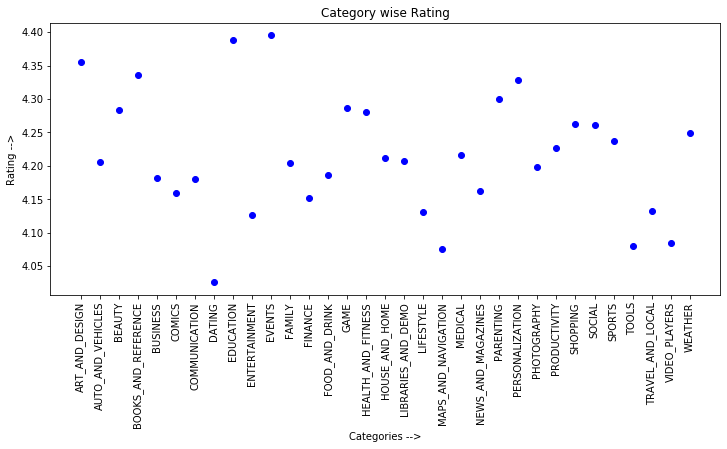

In [60]:
plt.figure(figsize = (12,5))
plt.plot(x, 'ro', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise Rating')
plt.xlabel('Categories -->')
plt.ylabel('Rating -->')
plt.show()

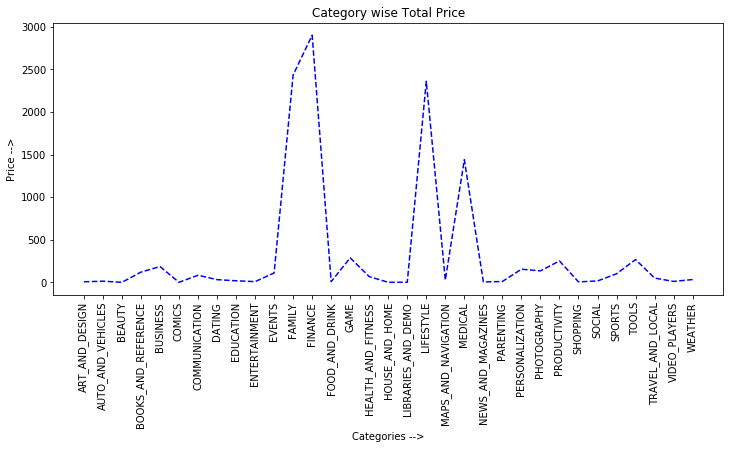

In [64]:

plt.figure(figsize = (12,5))
plt.plot(y, 'r--', color = 'b')
plt.title('Category wise Total Price')
plt.ylabel('Price -->')
plt.xlabel('Categories -->')
plt.xticks(rotation = 90)

plt.show()

[]

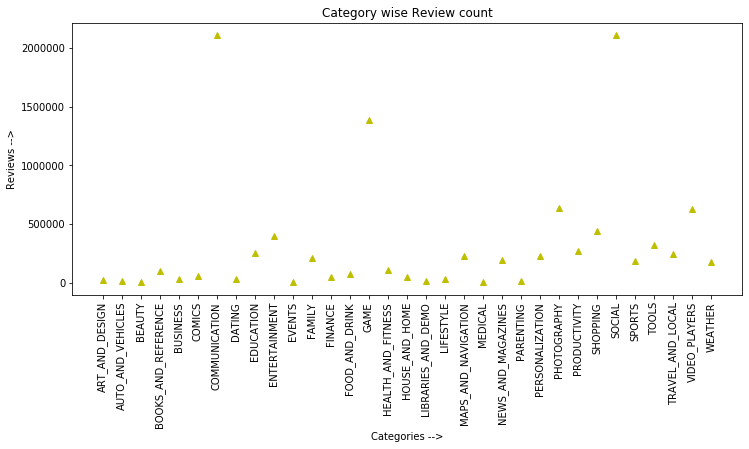

In [68]:
plt.figure(figsize = (12,5))
# plt.plot(z, 'bs', color = 'b')
plt.plot(z, 'g^', color = 'y')
plt.title('Category wise Review count')
plt.xlabel('Categories -->')
plt.ylabel('Reviews -->')
plt.xticks(rotation = 90)
plt.plot()